In [75]:
# Author: Güldeste Selen Dal
# Date: 04/21/20
# github.com/gselendal
# Classification: Gandalf vs Dumbledore
# Demonstration of the Lesson 2- Practical Deep Learning for Coders from fast.ai

In [2]:
from fastai.vision import *

In [44]:
folder = 'dumbledore'
file = 'dumbledore.csv'

In [48]:
folder = 'gandalf'
file = 'gandalf.csv'

In [49]:
path = Path('data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [52]:
classes = ['dumbledore','gandalf']

In [50]:
download_images(file,dest,max_pics = 200)

In [53]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dumbledore


gandalf


In [54]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [55]:
data.classes

['dumbledore', 'gandalf']

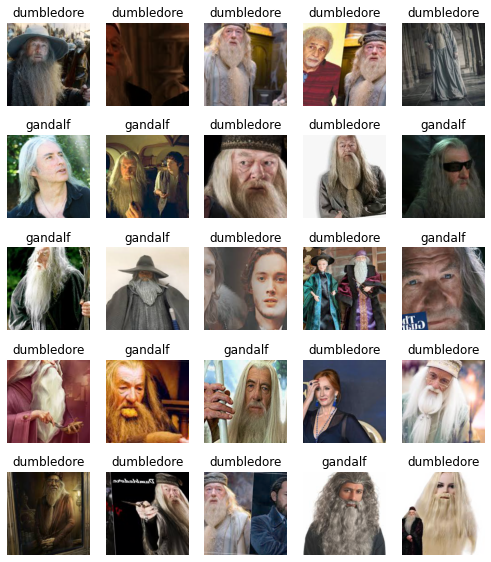

In [58]:
data.show_batch(rows=5, figsize=(7,8))

In [59]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dumbledore', 'gandalf'], 2, 288, 72)

In [61]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate,pretrained= True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [62]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.082714,0.759006,0.277778,00:03
1,0.854599,0.362364,0.152778,00:02
2,0.703816,0.297379,0.069444,00:02
3,0.677143,0.298355,0.097222,00:02


In [65]:
learn.save('stage-1')

In [67]:
learn.unfreeze()

In [68]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


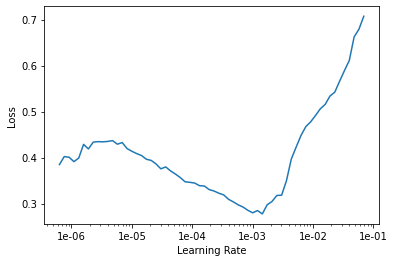

In [69]:
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.496319,0.380909,0.097222,00:02
1,0.408884,0.448403,0.152778,00:02


In [71]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (288 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dumbledore,dumbledore,dumbledore,dumbledore,dumbledore
Path: data;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gandalf,dumbledore,gandalf,gandalf,dumbledore
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.

In [72]:
interp = ClassificationInterpretation.from_learner(learn)

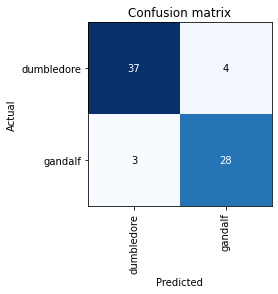

In [73]:
interp.plot_confusion_matrix()

In [74]:
from fastai.widgets import *

In [76]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


In [77]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1');

In [78]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [79]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())